In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shobika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
amz=pd.read_csv("status_text.csv")
amz.sample(5)

,status_text
267,"S550 M1 Finished Part MRD = Sept-4, 2015."
92,AIMS Review - Suggest we make sure we're align...
1198,Root cause: Wrong design assumption for Steeri...
503,ICA Implemented By changed from [no previous v...
115,Confirmed VDTP has started FAME entry for equi...


In [3]:
amz.status_text.isna().sum()

0

In [4]:
amz.status_text[(amz.status_text.str.len() == 0) | (amz.status_text == "")].shape[0]

0

In [5]:
print("Dimensions of dataset before dropping the NAs:",amz.shape)
amz = amz.dropna(subset=['status_text'])
print("Dimensions of dataset after dropping the NAs:",amz.shape)

Dimensions of dataset before dropping the NAs: (1211, 1)
Dimensions of dataset after dropping the NAs: (1211, 1)


In [21]:
d=dict()
corpus = []
stop_words = set(stopwords.words("english"))
for i in range(1,len(amz)):
    status_text = re.sub('[^a-zA-Z]', ' ', amz['status_text'][i])
    status_text = status_text.lower()
    status_text = status_text.split()
    for word in status_text:
        if (len(word)<6):
            if word in d:
                d[word] = d[word] + 1
            else:
                d[word] = 1
#     ps = PorterStemmer()
#     status_text = [ps.stem(word) for word in status_text
#                 if not word in set(stopwords.words('english'))]
    status_text = ' '.join(status_text) 
    corpus.append(status_text)
dope = dict((k, v) for k, v in d.items() if v >= 20)

marklist = sorted(dope.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(marklist)
for key,val in sortdict.items(): 
    print(key, ' : ', val)
amz.head()

to  :  1407
the  :  894
from  :  517
and  :  465
for  :  432
issue  :  392
of  :  373
no  :  366
with  :  359
on  :  324
be  :  308
is  :  301
in  :  273
value  :  232
will  :  230
a  :  222
by  :  220
this  :  218
that  :  169
as  :  158
pca  :  158
at  :  153
not  :  151
date  :  135
pd  :  125
ica  :  125
l  :  124
was  :  119
m  :  118
have  :  110
parts  :  108
are  :  102
has  :  100
we  :  97
d  :  93
per  :  83
new  :  81
me  :  81
aims  :  80
part  :  76
p  :  73
been  :  73
test  :  71
see  :  70
team  :  70
build  :  69
s  :  67
ford  :  65
up  :  63
need  :  61
can  :  61
if  :  61
gm  :  61
close  :  61
added  :  58
data  :  58
all  :  57
pfi  :  54
model  :  53
oil  :  53
an  :  51
type  :  50
it  :  49
aim  :  49
due  :  47
after  :  47
head  :  47
hole  :  44
may  :  43
next  :  43
were  :  42
lead  :  42
still  :  42
plan  :  41
there  :  40
cam  :  40
e  :  40
mm  :  40
out  :  39
c  :  39
vp  :  38
year  :  37
nano  :  37
when  :  37
i  :  37
cause  :  36
g  :  36
or

,status_text
0,"Lead Vehicle - Model Year changed from ""Nano 2..."
1,EK awaiting lab results (micrographs).
2,Lab results returned and reviewing on 29-Jan.
3,Results from lab show that no contamination or...
4,EK running additional FEA modeling. Looking a...


In [22]:
corpus[0:10]

['ek awaiting lab results micrographs',
 'lab results returned and reviewing on jan',
 'results from lab show that no contamination or degraded materials were found during analysis and that the returned parts meet the current specs stresses in the side walls in the crack area were also very low therefore the crack did not come from application loading on the cover additional tests are ongoing to determine root cause see new attachment',
 'ek running additional fea modeling looking at out of flat skewing effects that could generate extra stresses causing the cracks discussed the tardiness of closing pending issue and hope to be more expedient in the future',
 'the results presented by ek show that with a low level of warpage out of flatness the stresses near the crack area increase will be re running fea with a higher level of warpage see attachment',
 'attached d need to get additional out of flatness test results as well as the implementation date for corrective action out of flatness

In [23]:
vectorizer = CountVectorizer(stop_words='english')
V_s = vectorizer.fit_transform(corpus).toarray()

C:\Users\Shobika\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


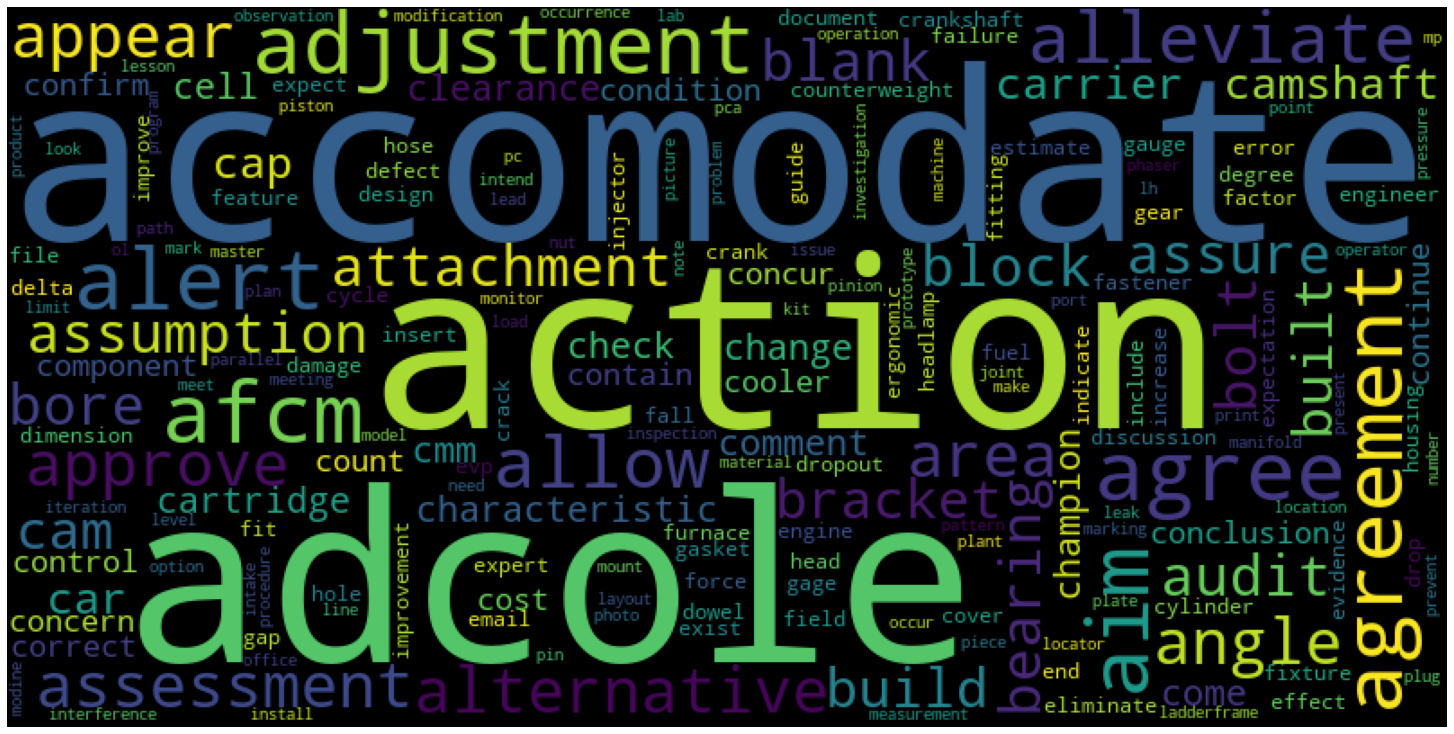

In [24]:
for_wordcloud = vectorizer.get_feature_names()
for_wordcloud = for_wordcloud
for_wordcloud_str = ' '.join(for_wordcloud)

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(20, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

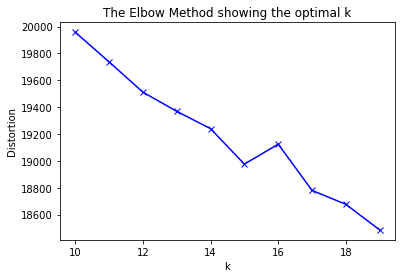

In [25]:
from sklearn.cluster import KMeans
distortions = []
K = range(10,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(V_s)
    distortions.append(kmeanModel.inertia_)
# plt.figure(figsize=(10,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

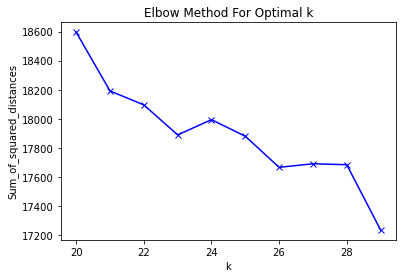

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
Sum_of_squared_distances = []
K = range(20,30)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(V_s)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
def idf_transform(word_col):
    w = len(word_col[np.nonzero(word_col)])
    return np.log(len(word_col)/(w + 1))

def tf_idf(bow):
    tf = np.log(bow + 1)
    idf = np.apply_along_axis(idf_transform,0,bow)
    return (np.multiply(tf,idf))

In [28]:
X = tf_idf(V_s)

In [29]:
def kmeans(V,k):

    k_center_i = random.sample(range(0,V.shape[0]),k)
    center_v = V[k_center_i, :]

    A_i = np.array([x for x in range(0,V.shape[0])])
    all_v_norm = np.apply_along_axis(np.linalg.norm,1,V)

    clusters = [None] * k
    clusters[0] = A_i.tolist()
    for i in range(1,k):
        clusters[i] = []
    j=0
    while True:
        
        print(j)
        for i in range(0,len(clusters)):
            print('cluster',i,len(clusters[i]))
        center_v_norm = np.apply_along_axis(np.linalg.norm,1,center_v)
        product_v = V @ np.transpose(center_v)
        product_v_n = np.apply_along_axis(np.true_divide,1,product_v,center_v_norm)
        product_v_norm = np.apply_along_axis(np.true_divide,0,product_v_n,all_v_norm)
        max_center = np.argmax(product_v,axis=1)

        clusters_new = [None] * k
        for i in range(k):
            r = np.where(np.array(max_center) == i)
            clusters_new[i] = r[0].tolist()

        if (np.array_equal(clusters,clusters_new)):
            break
        else:
            j = j+1

        for i in range(k):
            reviews = V[clusters_new[i], :]
            center_v[i] = np.mean(reviews,axis=0)
        clusters = clusters_new.copy()
    
    print("Clusters converged after",j+1,"iterations")
    return clusters

In [30]:
clusters = kmeans(X,8)

0
cluster 0 1210
cluster 1 0
cluster 2 0
cluster 3 0
cluster 4 0
cluster 5 0
cluster 6 0
cluster 7 0
1
cluster 0 355
cluster 1 411
cluster 2 174
cluster 3 92
cluster 4 17
cluster 5 86
cluster 6 33
cluster 7 42
2
cluster 0 16
cluster 1 294
cluster 2 104
cluster 3 111
cluster 4 287
cluster 5 173
cluster 6 100
cluster 7 125
3
cluster 0 57
cluster 1 298
cluster 2 113
cluster 3 127
cluster 4 166
cluster 5 202
cluster 6 108
cluster 7 139
4
cluster 0 61
cluster 1 300
cluster 2 113
cluster 3 128
cluster 4 167
cluster 5 195
cluster 6 111
cluster 7 135
5
cluster 0 64
cluster 1 301
cluster 2 110
cluster 3 129
cluster 4 164
cluster 5 195
cluster 6 112
cluster 7 135
6
cluster 0 66
cluster 1 301
cluster 2 110
cluster 3 129
cluster 4 163
cluster 5 195
cluster 6 111
cluster 7 135
Clusters converged after 7 iterations


C:\Users\Shobika\anaconda3\lib\site-packages\numpy\core\numeric.py:2440: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a1, a2 = asarray(a1), asarray(a2)


In [31]:
for i in range(0,len(clusters)):
    print(amz.iloc[clusters[i]][['status_text']].sample(7))

                                            status_text
528   Issue Type changed from "Manufacturing Quality...
1184  Metal sleeve was added for build timing contai...
407   HT will be capable for 7A153 and 7G334 by 17-A...
496   PD attempting to reduce complexity in snubbers...
83    CPMT resolved with Case - common gripper locat...
391   Aluminum machining:  Spline study capability t...
1112  Closed after completing quality cross referenc...
                                            status_text
1091          Temporarily repending to add PDI binning.
512   Issue Validated By changed from [no previous v...
475   Issue Validated By changed from [no previous v...
354   Issue Validated By changed from [no previous v...
655   Jumper line has been redesigned for M1 and bey...
739   PAT changed from "Basic Design" to "Basic Desi...
1027  Issue Validated By changed from [no previous v...
                                           status_text
950  Discussed in Dragon Assembly PAT Sept 9.  As

In [32]:
type (clusters[1])

list

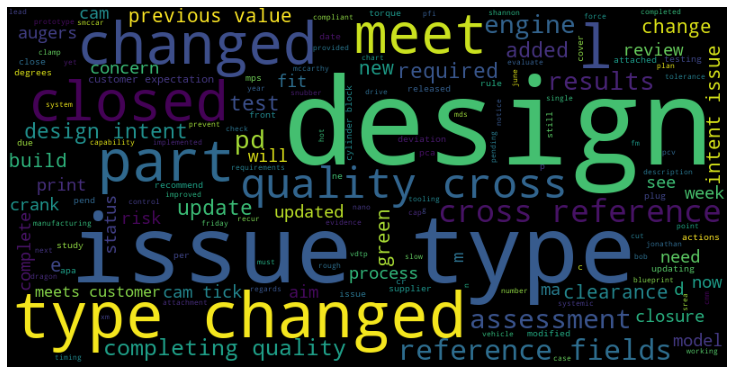

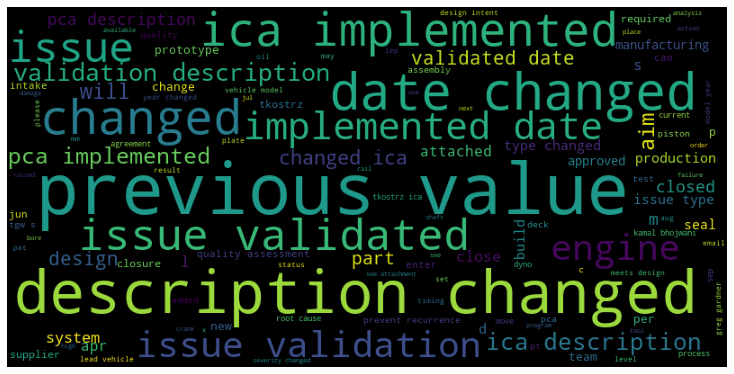

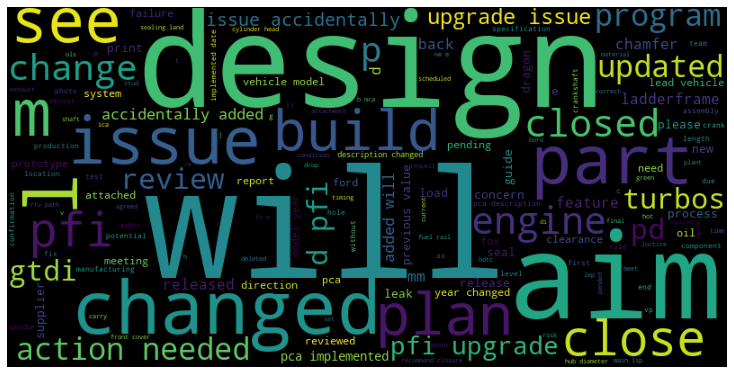

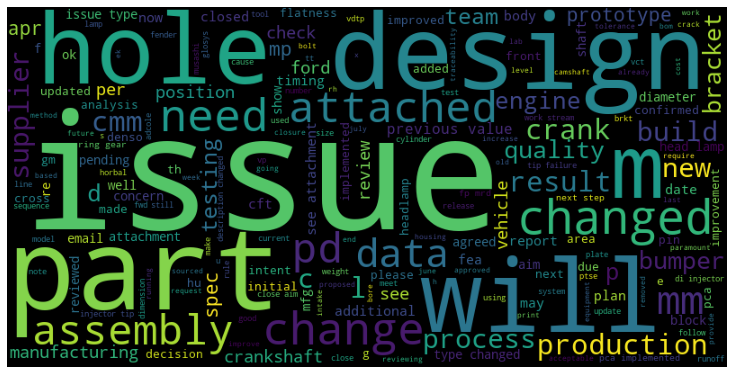

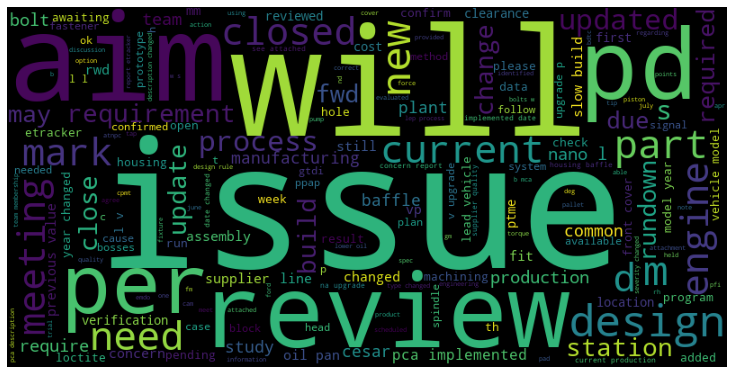

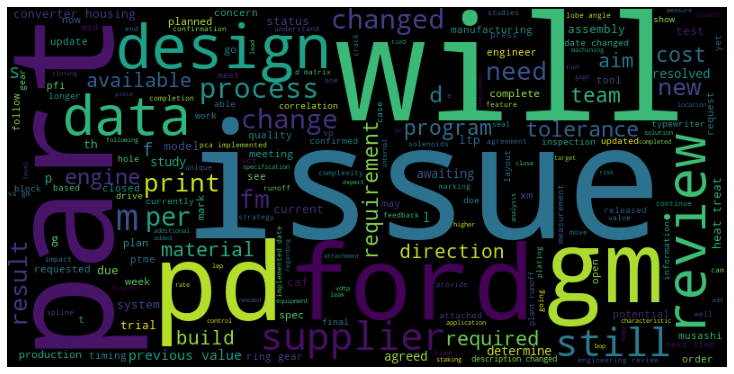

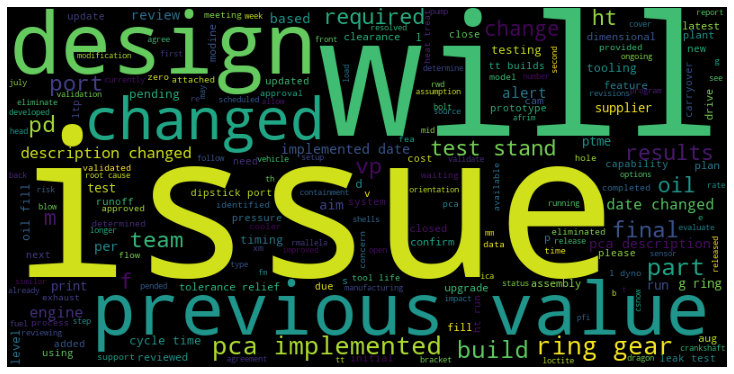

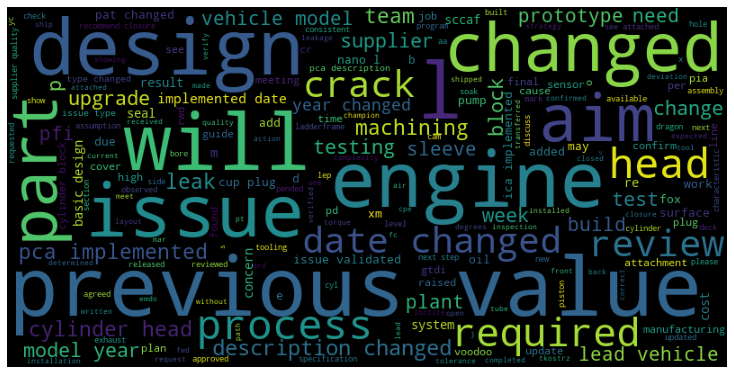

In [33]:
for x in range(0,len(clusters)):
    dense=' '.join(corpus[i-1] for i in clusters[x])
    wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(dense)

    plt.figure(figsize=(10,10), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
 
    plt.show()